Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import scipy.misc
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph
import codecs, json

import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "vae"
z_size=64


['434918446.npz', '1824020675.npz', '90546741.npz', '1878919047.npz', '1883684635.npz', '1415615802.npz', '192439919.npz', '1484561376.npz', '1410898486.npz', '1802718762.npz']
INFO:tensorflow:Model using cpu.
called build_graph


/home/hdilab/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


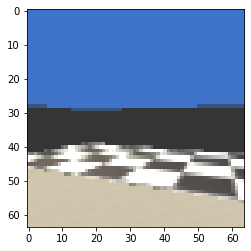

In [3]:
filelist = os.listdir(DATA_DIR)
print(filelist[0:10])

obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)

obs.shape

vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

#print(vae.get_model_params())
'''params = vae.get_model_params_with_name([ 'dec_fc/kernel:0', 'dec_fc/bias:0', 'dec_deconv1/kernel:0', 
                                  'dec_deconv1/bias:0', 'dec_deconv2/kernel:0', 'dec_deconv2/bias:0', 
                                  'dec_deconv3/kernel:0', 'dec_deconv3/bias:0', 'dec_deconv4/kernel:0', 
                                  'dec_deconv4/bias:0' ])'''
#print(params)

frame = random.choice(obs).reshape(1, 64, 64, 3)

# show recorded frame that will be fed into the input of VAE
#plt.imshow(frame[0])
#plt.show()

batch_z = vae.encode(frame)
#print(batch_z)
#z = np.array([0.022419227589574976, -0.021785935894510153, 3.491403446698959, 0.011729704633472927, -0.015467942692767167, 0.6364491733064316, -0.44976323076809, 2.4046685308673523, -0.0058074542060372325, 0.009784478896632219, -0.00026403455726098303, -0.029840968999506525, -0.37814658699431214, -0.0004444968602909296, -0.00934469240043211, -0.5187342394299207, -0.022237935193487678, 0.57082034453827, -15.727160874695306, -0.002145322681781194, 0.0014071995604071747, -0.021360840752450483, 3.39049396530434, -0.0035267033219411213, -5.090932631518887, -0.016064497123346736, 0.023509437875203296, -0.0030994964553817616, 0.1414765119312225, 0.023959710579295523, 0.009809894904241312, 0.007264741677940813, 0.030935980879404905, -0.01794590045542005, 0.030480841780224248, -3.480177491315457, 0.030344857495229152, 0.025644094115948996, 0.0040053006864711185, -0.06355516650912046, 3.292210223024471, -4.212915597038156, -0.015688190066750853, -0.01161766870110869, -0.44106319600602134, 0.00005202609744397703, 0.011657351962040716, 0.002942751614975321, 0.003901532767669586, -1.291073264013873, -0.01178068714332976, -3.576803273708621, -0.02611829449129318, 11.745465151461836, -0.004007472977050783, 0.7846386560818853, 0.011951943690016398, 0.02492865005275082, 0.006994804849921301, -3.836235224771758, -2.5317622260760655, -0.008916830922907288, -0.014414832629084424, 0.02118370685637623])
#z = z.reshape((1, 64))
reconstruct = vae.decode(batch_z)
# show reconstruction
#plt.imshow(reconstruct[0])
#plt.show()

#code to generate image and mu, logvar json files

for i in range(100,1000,1):

    frame = random.choice(obs).reshape(1, 64, 64, 3)

    # show recorded frame that will be fed into the input of VAE
    plt.imshow(frame[0])
    #plt.show()
    #plt.savefig('./pushblockdata/'+str(i)+'.png')
    scipy.misc.imsave('./pushblockdata/'+str(i)+'.png', frame[0])

    batch_z = vae.encode(frame)
    mu, sigma = vae.encode_mu_sigma(frame)
    arr = [mu[0], sigma[0]]
    arr = np.array(arr)
    arr = arr*10000 #factor is 10000
    arr = arr.astype(np.int32)
    b = arr.tolist() # nested lists with same data, indices
    #arr = arr.tolist()
    json.dump(b, codecs.open('./pushblockdata/'+str(i)+'.json', 'w', encoding='utf-8'), separators=(',', ':'), indent=4) ### this saves the array in .json format
    #print(mu, logvar)
    #print(batch_z[0]) # print out sampled z
    #reconstruct = vae.decode(batch_z)
    ### show reconstruction
    #plt.imshow(reconstruct[0])
    #plt.show()